In [ ]:
! gdown --id 1CXdGliMNkxWoZwFyDSYgD087Kz1l60cO

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CXdGliMNkxWoZwFyDSYgD087Kz1l60cO
To: /content/test.zip
100% 782M/782M [00:14<00:00, 55.3MB/s]


In [ ]:
! gdown --id 1SH-FxDdAttVzz9miiSinxbdTSdtWw-x4

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SH-FxDdAttVzz9miiSinxbdTSdtWw-x4
To: /content/train.zip
100% 3.04G/3.04G [00:42<00:00, 71.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = "/content/test.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
train_path = '/content/train'
test_path = '/content/test'


train_Impath = glob(train_path+'/*.tif')
test_Impath = glob(test_path+'/*.tif')
df = pd.DataFrame(train_Impath, columns = ['filepath'])
df3 = pd.DataFrame(test_Impath, columns = ['filepath'])

In [ ]:
df.head()

,filepath
0,/content/train/20060411_58469_0200_PP.tif
1,/content/train/20060410_44953_0200_PP.tif
2,/content/train/20051021_59459_0100_PP.tif
3,/content/train/20060523_43196_0100_PP.tif
4,/content/train/20060522_43643_0100_PP.tif


In [ ]:
df3.head()

,filepath
0,/content/test/20051202_55484_0400_PP.tif
1,/content/test/20051205_57704_0400_PP.tif
2,/content/test/20051130_55086_0400_PP.tif
3,/content/test/20051212_38000_0400_PP.tif
4,/content/test/20051202_51488_0400_PP.tif


In [ ]:
df2 = pd.read_excel(r"/content/train.xls")
df4 = pd.read_excel(r"/content/test.xls")

In [ ]:
def fun(a):
    return str(a)

In [ ]:
df['Retinopathy_grade'] = df2['Retinopathy grade'].apply(fun)
df3['Retinopathy_grade'] = df4['Retinopathy grade'].apply(fun)

In [ ]:
df_train = df.copy()
df_test = df3.copy()
df_train.head()

,filepath,Retinopathy_grade
0,/content/train/20060411_58469_0200_PP.tif,3
1,/content/train/20060410_44953_0200_PP.tif,0
2,/content/train/20051021_59459_0100_PP.tif,1
3,/content/train/20060523_43196_0100_PP.tif,2
4,/content/train/20060522_43643_0100_PP.tif,3


In [ ]:
tf.random.set_seed(42)

In [ ]:
Epochs = 5
Img_size = 512
Batch_size = 32

classes = {0 : "No DR",
           1 : "Mild DR",
           2 : "Severe DR",
           3 : "Proliferate DR"}

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
                                                         validation_split = 0.1)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
#                                                           rotation_range = 0.2,
#                                                           shear_range = 0.2,
#                                                           zoom_range = 0.2,
#                                                           width_shift_range = 0.2,
#                                                           height_shift_range = 0.3,
#                                                          horizontal_flip = True,
#                                                          validation_split = 0.1)

In [ ]:
train_gen = datagen.flow_from_dataframe(dataframe = df_train,
                                   x_col = 'filepath',
                                   y_col = 'Retinopathy_grade',
                                   subset = 'training',
                                   seed = 1,
                                   batch_size = Batch_size,
                                   color_mode = 'rgb',
                                   shuffle = True,
                                   class_mode = 'categorical',
                                   target_size = (Img_size, Img_size))

valid_gen = datagen.flow_from_dataframe(dataframe = df_train,
                                   x_col = 'filepath',
                                   y_col = 'Retinopathy_grade',
                                   subset = 'validation',
                                   seed = 1,
                                   batch_size = Batch_size,
                                   color_mode = 'rgb',
                                   shuffle = False,
                                   class_mode = 'categorical',
                                   target_size = (Img_size, Img_size))

test_gen = datagen.flow_from_dataframe(dataframe = df_test,
                                      x_col = 'filepath',
                                      y_col = 'Retinopathy_grade',
                                      batch_size = Batch_size,
                                      seed = 1,
                                      color_mode = 'rgb',
                                      shuffle = False,
                                      class_mode = None,
                                      target_size = (Img_size, Img_size))

Found 864 validated image filenames belonging to 4 classes.
Found 96 validated image filenames belonging to 4 classes.
Found 240 validated image filenames.


In [ ]:
step_size_train = train_gen.n//train_gen.batch_size
step_size_valid = valid_gen.n//valid_gen.batch_size

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  #plot accuracy
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
import tensorflow as tf
import pandas as pd
from glob import glob

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

## Tiny AlexNet

In [ ]:
model1 = Sequential([
    Conv2D(10, 3, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model1.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history1 = model1.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 31s 723ms/step - loss: 1.3017 - accuracy: 0.4664 - val_loss: 1.3953 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 20s 717ms/step - loss: 1.2664 - accuracy: 0.4884 - val_loss: 1.4169 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2551 - accuracy: 0.4884 - val_loss: 1.3677 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2514 - accuracy: 0.4884 - val_loss: 1.3971 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2436 - accuracy: 0.4884 - val_loss: 1.3900 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 707ms/step - loss: 1.2500 - accuracy: 0.4907 - val_loss: 1.4226 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2497 - accuracy: 0.4884 - val_loss: 1.6532 - val_accuracy: 0.3125

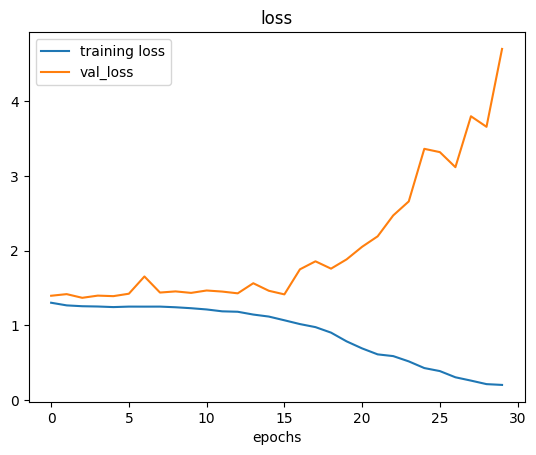

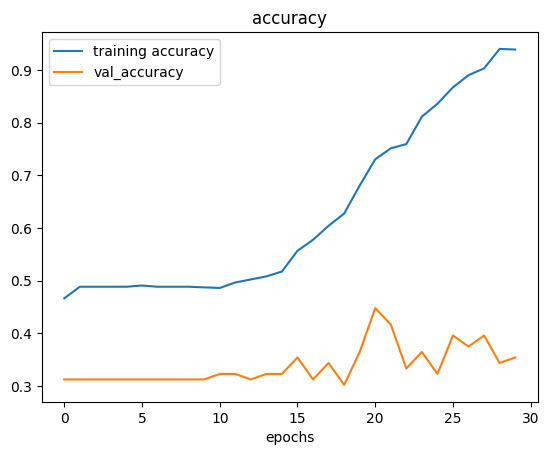

In [ ]:
plot_loss_curves(history1)

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 510, 510, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 255, 255, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 253, 253, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 126, 126, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 10)      

## AlexNet

In [ ]:
model4 = Sequential([
    Conv2D(10, 3, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model4.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history4 = model4.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 40)

Epoch 1/40
27/27 [==============================] - 22s 721ms/step - loss: 1.3022 - accuracy: 0.4803 - val_loss: 1.4600 - val_accuracy: 0.3125
Epoch 2/40
27/27 [==============================] - 19s 715ms/step - loss: 1.2565 - accuracy: 0.4884 - val_loss: 1.4521 - val_accuracy: 0.3125
Epoch 3/40
27/27 [==============================] - 19s 717ms/step - loss: 1.2590 - accuracy: 0.4884 - val_loss: 1.4286 - val_accuracy: 0.3125
Epoch 4/40
27/27 [==============================] - 19s 712ms/step - loss: 1.2567 - accuracy: 0.4884 - val_loss: 1.4863 - val_accuracy: 0.3125
Epoch 5/40
27/27 [==============================] - 19s 717ms/step - loss: 1.2646 - accuracy: 0.4884 - val_loss: 1.4267 - val_accuracy: 0.3125
Epoch 6/40
27/27 [==============================] - 19s 706ms/step - loss: 1.2489 - accuracy: 0.4884 - val_loss: 1.4493 - val_accuracy: 0.3125
Epoch 7/40
27/27 [==============================] - 19s 714ms/step - loss: 1.2550 - accuracy: 0.4884 - val_loss: 1.3844 - val_accuracy: 0.3125

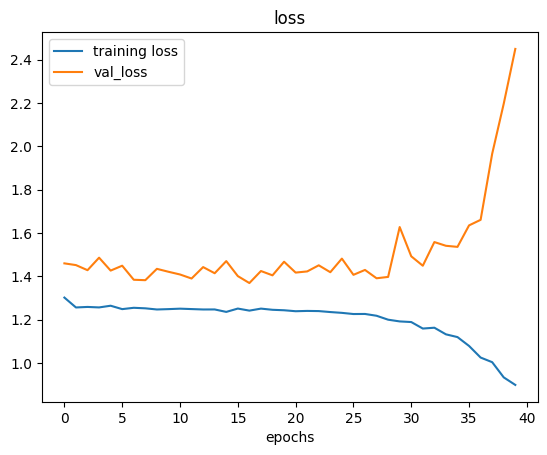

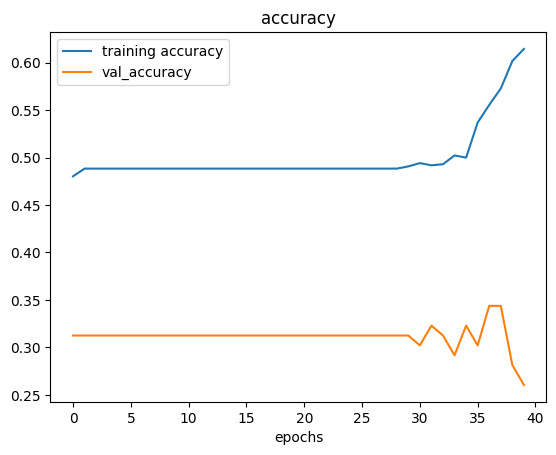

In [ ]:
plot_loss_curves(history4)

## AlexNet with increased filter size

In [ ]:
model7 = Sequential([
    Conv2D(10, 11, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 5, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model7.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history7 = model7.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 24s 737ms/step - loss: 1.2929 - accuracy: 0.4769 - val_loss: 1.3955 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 711ms/step - loss: 1.2617 - accuracy: 0.4884 - val_loss: 1.3821 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 722ms/step - loss: 1.2583 - accuracy: 0.4884 - val_loss: 1.4200 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 714ms/step - loss: 1.2504 - accuracy: 0.4884 - val_loss: 1.3932 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 723ms/step - loss: 1.2573 - accuracy: 0.4884 - val_loss: 1.4140 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 716ms/step - loss: 1.2610 - accuracy: 0.4884 - val_loss: 1.4073 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 722ms/step - loss: 1.2510 - accuracy: 0.4884 - val_loss: 1.3961 - val_accuracy: 0.3125

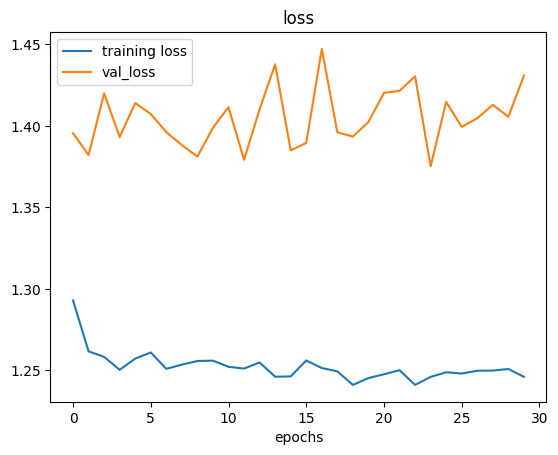

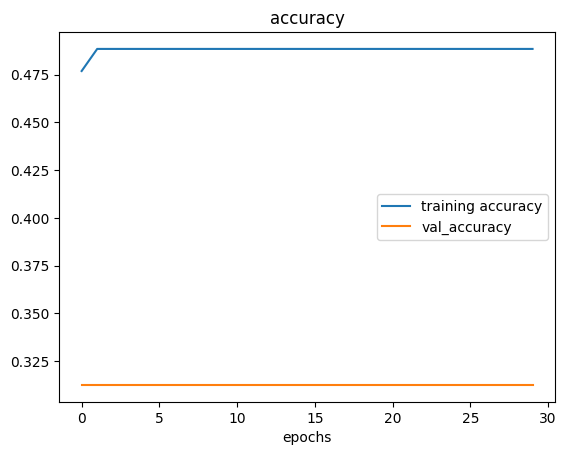

In [ ]:
plot_loss_curves(history7)

## AlexNet with Increased filter size and number of filters

In [ ]:
model8 = Sequential([
    Conv2D(100, 11, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(100, 5, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(100, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(100, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(100, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model8.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history8 = model8.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 32s 737ms/step - loss: 1.3450 - accuracy: 0.4722 - val_loss: 1.3714 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2684 - accuracy: 0.4884 - val_loss: 1.3948 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 20s 732ms/step - loss: 1.2581 - accuracy: 0.4884 - val_loss: 1.4355 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 711ms/step - loss: 1.2569 - accuracy: 0.4884 - val_loss: 1.4041 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 717ms/step - loss: 1.2553 - accuracy: 0.4884 - val_loss: 1.3910 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 714ms/step - loss: 1.2508 - accuracy: 0.4884 - val_loss: 1.4000 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 20s 720ms/step - loss: 1.2561 - accuracy: 0.4884 - val_loss: 1.3734 - val_accuracy: 0.3125

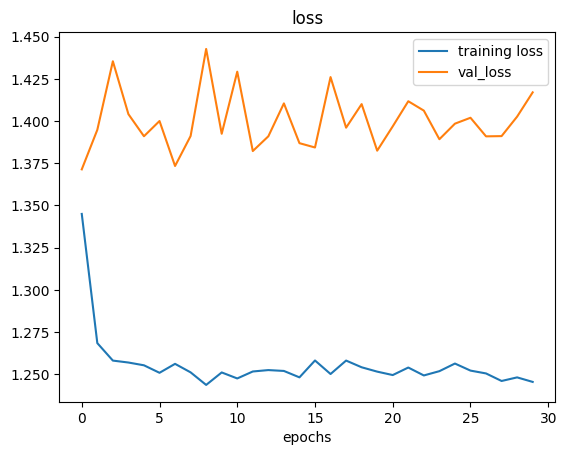

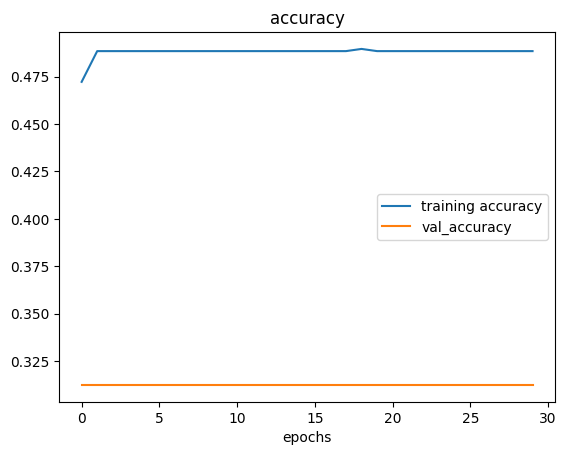

In [ ]:
plot_loss_curves(history8)

## LeNet-5

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

In [ ]:
model2 = Sequential([
    Conv2D(10, 5, input_shape = (512, 512, 3), activation = 'tanh'),
    AveragePooling2D(),
    Conv2D(10, 5, activation = 'tanh'),
    AveragePooling2D(),
    Flatten(),
    Dense(20, activation = 'tanh'),
    Dense(10, activation = 'tanh'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model2.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history2 = model2.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 23s 734ms/step - loss: 1.6529 - accuracy: 0.4884 - val_loss: 1.8752 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 709ms/step - loss: 1.3367 - accuracy: 0.4884 - val_loss: 1.5203 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 707ms/step - loss: 1.2564 - accuracy: 0.4884 - val_loss: 1.4192 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 20s 724ms/step - loss: 1.2468 - accuracy: 0.4884 - val_loss: 1.4168 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 721ms/step - loss: 1.2465 - accuracy: 0.4884 - val_loss: 1.4115 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2456 - accuracy: 0.4884 - val_loss: 1.4092 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2454 - accuracy: 0.4884 - val_loss: 1.4008 - val_accuracy: 0.3125

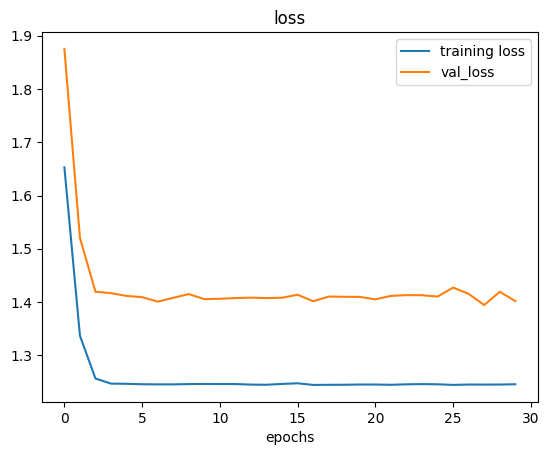

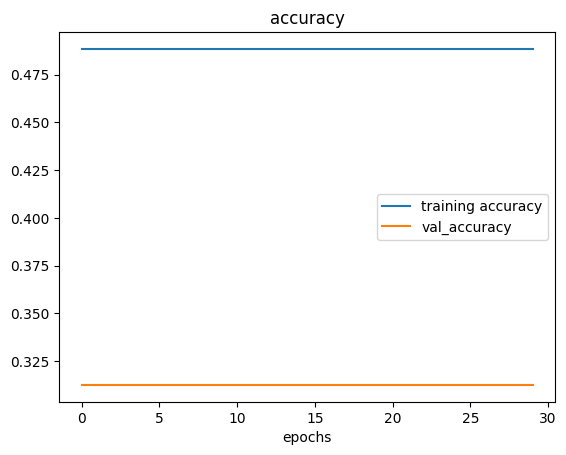

In [ ]:
plot_loss_curves(history2)

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 508, 508, 10)      760       
                                                                 
 average_pooling2d_4 (Averag  (None, 254, 254, 10)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_17 (Conv2D)          (None, 250, 250, 10)      2510      
                                                                 
 average_pooling2d_5 (Averag  (None, 125, 125, 10)     0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 156250)            0         
                                                                 
 dense_12 (Dense)            (None, 20)               

## Tiny VGG16

In [ ]:
model3 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model3.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history3 = model3.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 24s 723ms/step - loss: 1.3131 - accuracy: 0.4676 - val_loss: 1.3643 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 708ms/step - loss: 1.2579 - accuracy: 0.4884 - val_loss: 1.3902 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 707ms/step - loss: 1.2511 - accuracy: 0.4884 - val_loss: 1.3687 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 713ms/step - loss: 1.2480 - accuracy: 0.4884 - val_loss: 1.4505 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 719ms/step - loss: 1.2403 - accuracy: 0.4884 - val_loss: 1.4219 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2525 - accuracy: 0.4884 - val_loss: 1.5101 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 708ms/step - loss: 1.2392 - accuracy: 0.4884 - val_loss: 1.3799 - val_accuracy: 0.3125

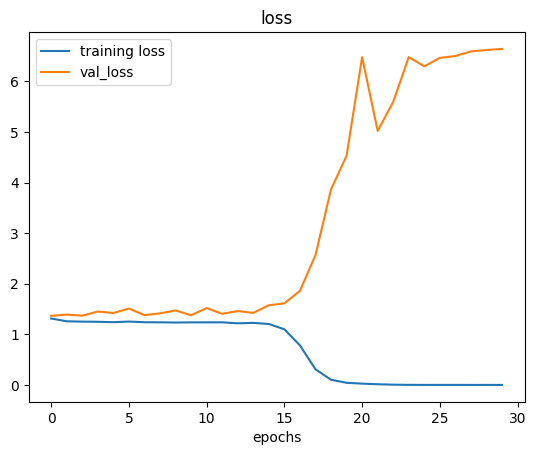

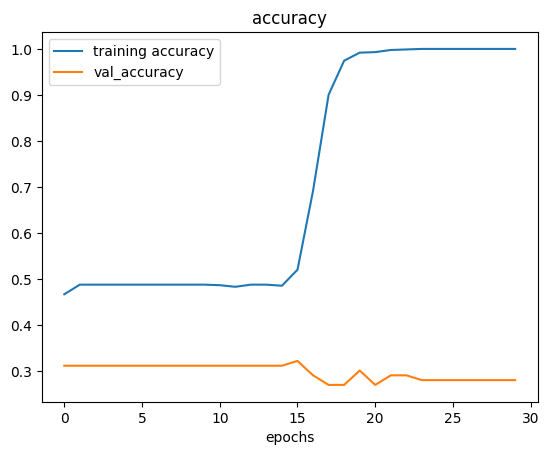

In [ ]:
plot_loss_curves(history3)

## Tiny VGG16 with dropout - regularisation

In [ ]:
model10 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model10.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history10 = model10.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 23s 732ms/step - loss: 1.4403 - accuracy: 0.4572 - val_loss: 1.4617 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2689 - accuracy: 0.4873 - val_loss: 1.4120 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 719ms/step - loss: 1.2883 - accuracy: 0.4861 - val_loss: 1.3714 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2680 - accuracy: 0.4850 - val_loss: 1.5861 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 711ms/step - loss: 1.2671 - accuracy: 0.4884 - val_loss: 1.4461 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 718ms/step - loss: 1.2502 - accuracy: 0.4884 - val_loss: 1.4081 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 713ms/step - loss: 1.2469 - accuracy: 0.4884 - val_loss: 1.4067 - val_accuracy: 0.3125

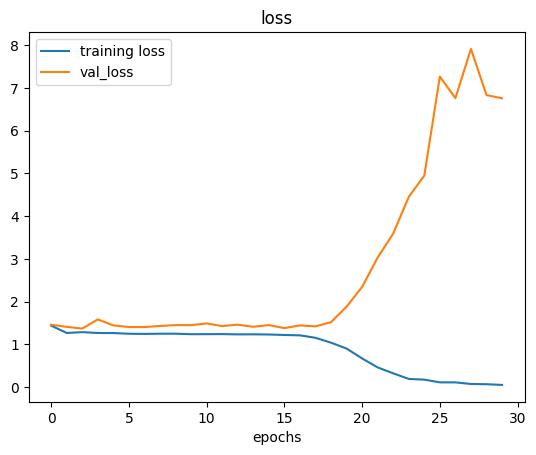

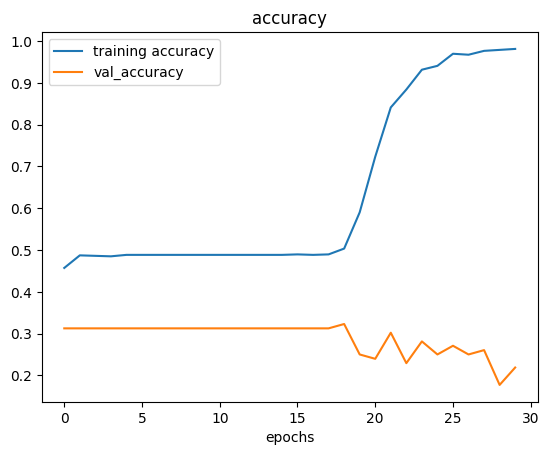

In [ ]:
plot_loss_curves(history10)

## Tiny VGG16 with 2 dropouts and max Pool layer regularisation

In [ ]:
model11 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation = 'relu'),
    Dropout(0.3),
    Dense(4, activation = 'softmax')
])

In [ ]:
model11.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history11 = model11.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 23s 727ms/step - loss: 1.3303 - accuracy: 0.4317 - val_loss: 1.4657 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 714ms/step - loss: 1.2981 - accuracy: 0.4803 - val_loss: 1.4467 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2919 - accuracy: 0.4838 - val_loss: 1.4163 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2741 - accuracy: 0.4838 - val_loss: 1.3992 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2879 - accuracy: 0.4850 - val_loss: 1.3800 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 714ms/step - loss: 1.2805 - accuracy: 0.4884 - val_loss: 1.3737 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 716ms/step - loss: 1.2801 - accuracy: 0.4861 - val_loss: 1.4274 - val_accuracy: 0.3125

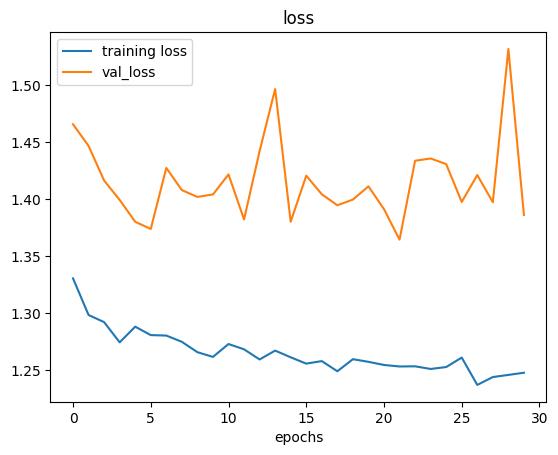

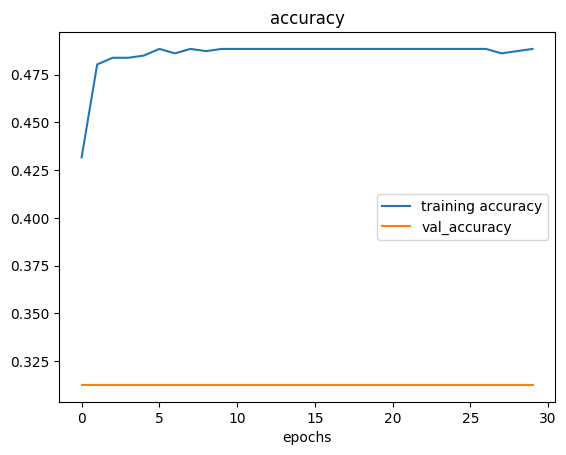

In [ ]:
plot_loss_curves(history11)

## VGG16

In [ ]:
model5 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model5.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history5 = model5.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 24s 716ms/step - loss: 1.3023 - accuracy: 0.4688 - val_loss: 1.3103 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 708ms/step - loss: 1.2666 - accuracy: 0.4884 - val_loss: 1.3756 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 711ms/step - loss: 1.2634 - accuracy: 0.4884 - val_loss: 1.3306 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 707ms/step - loss: 1.2599 - accuracy: 0.4884 - val_loss: 1.4100 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2566 - accuracy: 0.4884 - val_loss: 1.3780 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 705ms/step - loss: 1.2530 - accuracy: 0.4884 - val_loss: 1.3644 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 704ms/step - loss: 1.2504 - accuracy: 0.4884 - val_loss: 1.3586 - val_accuracy: 0.3125

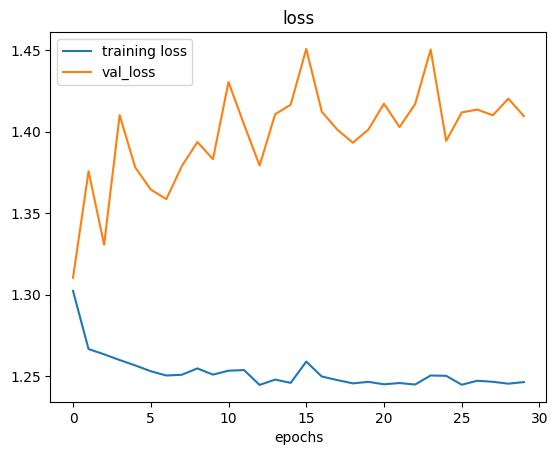

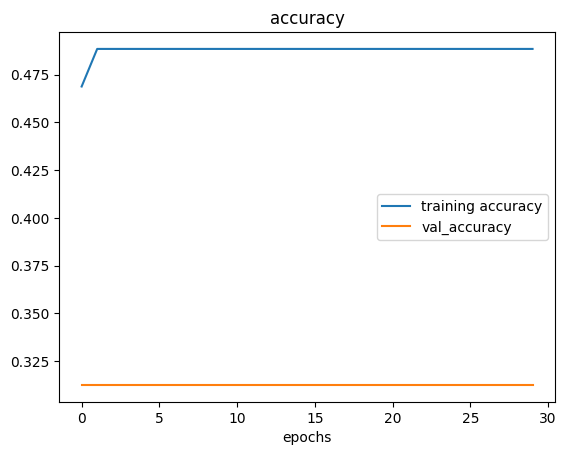

In [ ]:
plot_loss_curves(history5)

## VGG6 with increased filter size and number of filters

In [ ]:
model9 = Sequential([
    Conv2D(100, 3, activation = 'relu'),
    Conv2D(100, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(50, 3, activation = 'relu'),
    Conv2D(50, 3, activation = 'relu'),
    Conv2D(50, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model9.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history9 = model9.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 36s 726ms/step - loss: 1.3211 - accuracy: 0.4873 - val_loss: 1.3607 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2574 - accuracy: 0.4884 - val_loss: 1.3782 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 715ms/step - loss: 1.2506 - accuracy: 0.4884 - val_loss: 1.3842 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 704ms/step - loss: 1.2545 - accuracy: 0.4884 - val_loss: 1.4109 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 20s 718ms/step - loss: 1.2507 - accuracy: 0.4884 - val_loss: 1.4028 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 708ms/step - loss: 1.2456 - accuracy: 0.4884 - val_loss: 1.3998 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2505 - accuracy: 0.4884 - val_loss: 1.4024 - val_accuracy: 0.3125

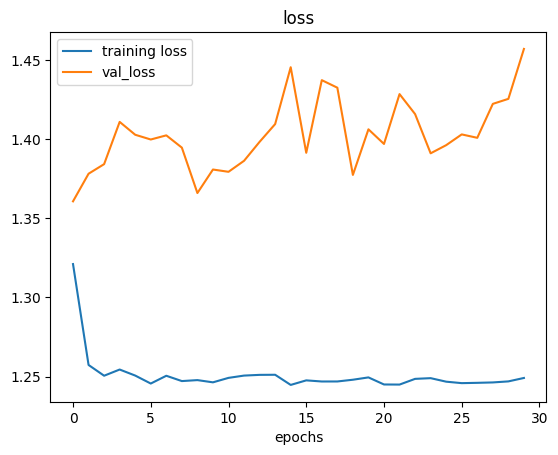

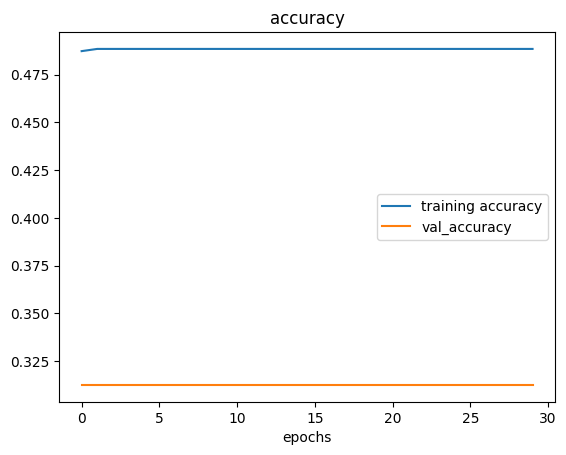

In [ ]:
plot_loss_curves(history9)

## Exp 1 Model

In [ ]:
model12 = Sequential([
    Conv2D(10, 3, input_shape=(512, 512, 3), activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(4, activation = 'softmax')
])

In [ ]:
model12.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history12 = model12.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 30)

Epoch 1/30
27/27 [==============================] - 22s 730ms/step - loss: 1.7076 - accuracy: 0.4317 - val_loss: 1.4545 - val_accuracy: 0.3125
Epoch 2/30
27/27 [==============================] - 19s 707ms/step - loss: 1.2754 - accuracy: 0.4826 - val_loss: 1.5837 - val_accuracy: 0.3125
Epoch 3/30
27/27 [==============================] - 19s 710ms/step - loss: 1.2508 - accuracy: 0.4884 - val_loss: 1.4396 - val_accuracy: 0.3125
Epoch 4/30
27/27 [==============================] - 19s 716ms/step - loss: 1.2403 - accuracy: 0.4884 - val_loss: 1.4798 - val_accuracy: 0.3125
Epoch 5/30
27/27 [==============================] - 19s 708ms/step - loss: 1.2324 - accuracy: 0.4884 - val_loss: 1.3958 - val_accuracy: 0.3125
Epoch 6/30
27/27 [==============================] - 19s 712ms/step - loss: 1.2369 - accuracy: 0.4931 - val_loss: 1.4879 - val_accuracy: 0.3125
Epoch 7/30
27/27 [==============================] - 19s 717ms/step - loss: 1.2193 - accuracy: 0.4919 - val_loss: 1.3792 - val_accuracy: 0.3229

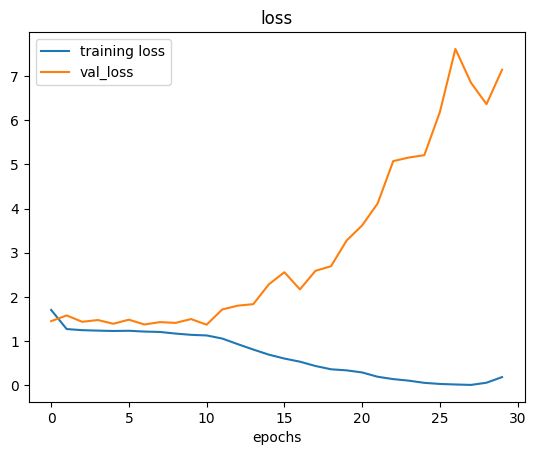

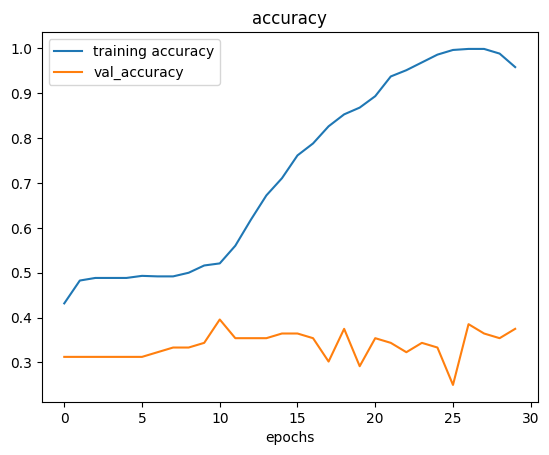

In [ ]:
plot_loss_curves(history12)

In [ ]:
model1.save("model1_d2.h5")
model2.save("model2_d2.h5")
model3.save("model3_d2.h5")
model4.save("model4_d2.h5")
model5.save("model5_d2.h5")
model7.save("model7_d2.h5")
model8.save("model8_d2.h5")
model9.save("model9_d2.h5")
model10.save("model10_d2.h5")
model11.save("model11_d2.h5")
model12.save("model12_d2.h5")
